# DL(w2) DNN
student ID: 7110018036\
name: Chieh-An, Chou

# [1] Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
from tensorflow.keras.datasets import boston_housing
(x_train_set, y_train_set), (x_test, y_test) = boston_housing.load_data()

2023-03-03 17:54:25.200834: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 17:54:25.693640: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/lib64
2023-03-03 17:54:25.693691: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda-11.7/lib64:/usr/local/cuda-11.7/extras/CUPTI/

### (check data)

In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [4]:
x_train_set

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

### Split data
split data into two parts: for training and for validation

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state = 1)
# defalt: test_size = 0.25 >> train 303 : valid 101
# setting fixed random state

### Preprocessing

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

# transform with mean and SD of x_train
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

## 1. Build Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [8]:
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=x_train.shape[1:])) # x_train.shape[1:] = 13
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))

2023-03-03 17:54:26.775913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 17:54:26.804146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 17:54:26.804267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 17:54:26.804718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

### (check model)
+ Param #\
dense: 1400 = (1+13)*100\
dense_1: 5050 = (1+100)*50\
dense_2: 51 = (1+50)*1

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1400      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________


### (get weights and bias)
initial values of trainable params:
bias = 0, wight = random

In [10]:
weights, biases = model.layers[1].get_weights() # dense_1

In [11]:
biases.shape, biases

((50,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [12]:
weights.shape, weights

((100, 50),
 array([[-0.12089147,  0.08479463, -0.07757478, ..., -0.15962534,
          0.13530149, -0.1545384 ],
        [ 0.03898664,  0.0066162 ,  0.0477694 , ...,  0.08018632,
         -0.00324531, -0.04650798],
        [-0.1778029 , -0.15020761, -0.08973318, ..., -0.11105509,
          0.08516051,  0.08134018],
        ...,
        [ 0.04735442, -0.14176445, -0.10669684, ...,  0.17526256,
         -0.02899536,  0.0960515 ],
        [-0.1680521 , -0.01969938,  0.15671153, ..., -0.11010528,
          0.10064389,  0.04671645],
        [-0.16460657, -0.08675203, -0.00232454, ...,  0.17083083,
         -0.13994098, -0.16906539]], dtype=float32))

## 2. Compile

In [13]:
model.compile(loss='mse', optimizer=SGD(learning_rate=1e-3))
# 'mse' for regression

## 3. Train 

In [14]:
train = model.fit(x_train, y_train,
                  epochs=20,
                  validation_data=(x_valid, y_valid))
# defalt: batch_size=32

Epoch 1/20
 1/10 [==>...........................] - ETA: 8s - loss: 548.3702

2023-03-03 17:54:28.677196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-03 17:54:28.678920: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fe5440e2680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-03 17:54:28.678932: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-03 17:54:28.708570: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 [==============================] - 1s 12ms/step - loss: 506.3078 - val_loss: 352.9475
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 177.5718 - val_loss: 68.0520
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 42.3287 - val_loss: 39.6227
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 28.4117 - val_loss: 31.3002
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 23.3424 - val_loss: 26.6341
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 20.4347 - val_loss: 24.1791
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 18.5173 - val_loss: 21.8264
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 17.2056 - val_loss: 20.2735
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 15.8360 - val_loss: 18.9752
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 14.6454 - val_loss: 17.0649
Epoch 

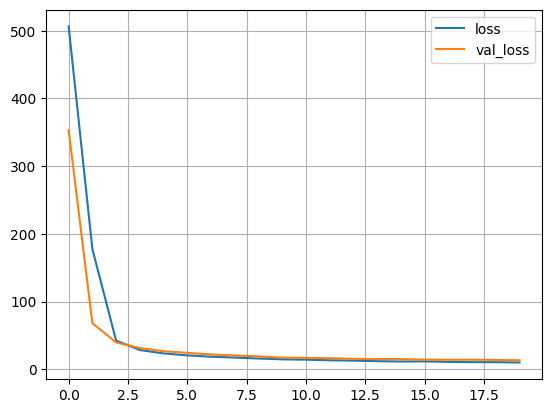

In [15]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

## 4. Evaluate

In [16]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 24.3054


24.30538558959961

## 5. Predict

In [17]:
print("y_hat = ", model.predict(x_test[:3]), sep="\n")
print("y_true = ", y_test[:3], sep="\n")

1/1 [==============================] - 0s 44ms/step
y_hat = 
[[ 7.645019]
 [17.488892]
 [20.750195]]
y_true = 
[ 7.2 18.8 19. ]


# [2] Classification

### Data

In [18]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

### (check data)

In [19]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


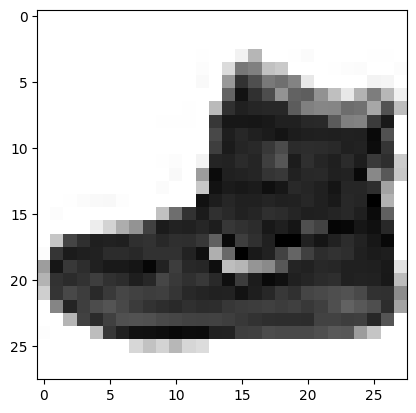

In [20]:
i = 0
print(y_train_set[i]) # lables:0-9, 9 = Boot
plt.imshow(x_train_set[i],cmap="binary")
plt.show()

### Split data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, y_train_set, random_state = 1)

### Preprocessing

In [22]:
# x value: 0-255 >> 0-1
x_train = x_train/255
x_valid = x_valid/255
x_test = x_test/255

## 1. Build Model

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [24]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]), # (28, 28) >> (28*28,)
    Dense(units=300, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='softmax')
])

### (check model)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


## 2. Compile

In [26]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

## 3. Train 

In [27]:
train = model.fit(x_train, y_train,
                  epochs=20,
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.7732 - accuracy: 0.7454 - val_loss: 0.6782 - val_accuracy: 0.7671
Epoch 2/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4963 - accuracy: 0.8258 - val_loss: 0.4957 - val_accuracy: 0.8223
Epoch 3/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4434 - accuracy: 0.8428 - val_loss: 0.4639 - val_accuracy: 0.8345
Epoch 4/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.4125 - accuracy: 0.8540 - val_loss: 0.4169 - val_accuracy: 0.8514
Epoch 5/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3904 - accuracy: 0.8624 - val_loss: 1.0899 - val_accuracy: 0.6508
Epoch 6/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3722 - accuracy: 0.8682 - val_loss: 0.6659 - val_accuracy: 0.7898
Epoch 7/20
1407/1407 [==============================] - 2s 2ms/step - loss: 0.3554 - accuracy: 0.8727 - val_loss: 0.3922 - val_accuracy:

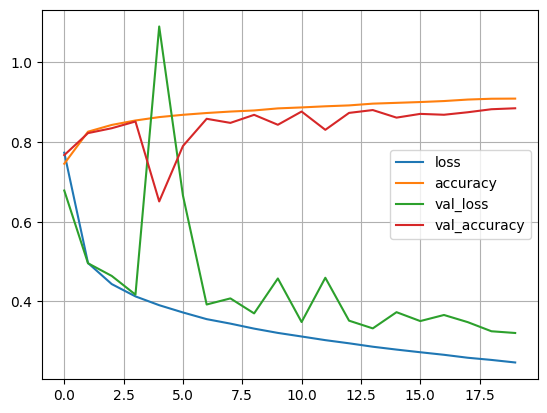

In [28]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

## 4. Evaluate

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 941us/step - loss: 0.3526 - accuracy: 0.8773


[0.35264313220977783, 0.8773000240325928]

## 5. Predict

In [30]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob,axis=1)
print("y_prob = ", y_prob[:3].round(2), sep="\n")
print("y_pred = ", y_pred[:3])
print("y_true = ", y_test[:3])

313/313 [==============================] - 0s 812us/step
y_prob = 
[[0.   0.   0.   0.   0.   0.   0.   0.06 0.   0.94]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
y_pred =  [9 2 1]
y_true =  [9 2 1]


### (Confussion Matrix)

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[824,   0,  17,  36,   4,   1, 105,   1,  12,   0],
       [  3, 964,   2,  25,   3,   0,   1,   0,   2,   0],
       [ 12,   0, 801,  19,  58,   0,  98,   0,  11,   1],
       [ 18,   6,  11, 923,  12,   0,  24,   0,   6,   0],
       [  0,   1, 127,  54, 716,   0,  97,   0,   5,   0],
       [  0,   0,   0,   0,   0, 945,   0,  40,   3,  12],
       [111,   2,  70,  38,  41,   0, 718,   0,  20,   0],
       [  0,   0,   0,   0,   0,  10,   0, 978,   0,  12],
       [  2,   0,   1,  10,   3,   1,   4,   5, 974,   0],
       [  0,   0,   0,   0,   0,  10,   1,  59,   0, 930]])